<a href="https://colab.research.google.com/github/Siphesihle13/MoodRecommendationSystem/blob/main/research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Music Mood Classification using GMM \\
Compiled by: Siphesihle Ndhlovu (1599603)

In [ ]:
!pip install pgmpy
!pip install matplotlib

In [ ]:
!pip install bnlearn

In [ ]:
#from google.colab import files
#uploaded=files.upload()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
import pandas as pd
from pgmpy.models import BayesianModel
import seaborn as sns
import bnlearn as bn

import io

In [ ]:
from sklearn.cluster import KMeans


In [ ]:
#spotify_df = pd.read_csv(io.BytesIO(uploaded['data_o.csv']))

spotify_df = pd.read_csv('data_o.csv')

spotify_df=spotify_df.drop("id",axis=1)

In [ ]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   instrumentalness  170653 non-null  float64
 9   key               170653 non-null  int64  
 10  liveness          170653 non-null  float64
 11  loudness          170653 non-null  float64
 12  mode              170653 non-null  int64  
 13  name              170653 non-null  object 
 14  popularity        170653 non-null  int64  
 15  release_date      170653 non-null  object 
 16  speechiness       17

In [ ]:
spotify_df.corr()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
valence,1.000000,-0.028245,-0.184101,0.558946,-0.191813,0.353876,-0.018613,-0.198501,0.028473,0.003832,0.313512,0.015641,0.014200,0.046381,0.171689
year,-0.028245,1.000000,-0.614250,0.188515,0.079713,0.530272,0.220881,-0.272371,0.007540,-0.057318,0.487697,-0.032385,0.862442,-0.167816,0.141048
acousticness,-0.184101,-0.614250,1.000000,-0.266852,-0.076373,-0.749393,-0.246007,0.329819,-0.020550,-0.024482,-0.561696,0.047168,-0.573162,-0.043980,-0.207120
danceability,0.558946,0.188515,-0.266852,1.000000,-0.139937,0.221967,0.241757,-0.278063,0.024439,-0.100193,0.285057,-0.045956,0.199606,0.235491,0.001801
duration_ms,-0.191813,0.079713,-0.076373,-0.139937,1.000000,0.042119,-0.048880,0.084770,-0.004266,0.047168,-0.003037,-0.046085,0.059597,-0.084604,-0.025472
energy,0.353876,0.530272,-0.749393,0.221967,0.042119,1.000000,0.132723,-0.281101,0.027705,0.126192,0.782362,-0.039260,0.485005,-0.070555,0.250865
explicit,-0.018613,0.220881,-0.246007,0.241757,-0.048880,0.132723,1.000000,-0.140987,0.005432,0.039640,0.140300,-0.078872,0.191543,0.414070,0.011969
instrumentalness,-0.198501,-0.272371,0.329819,-0.278063,0.084770,-0.281101,-0.140987,1.000000,-0.014591,-0.047193,-0.408611,-0.036543,-0.296750,-0.121700,-0.105361
key,0.028473,0.007540,-0.020550,0.024439,-0.004266,0.027705,0.005432,-0.014591,1.000000,0.000205,0.017385,-0.116260,0.007826,0.023784,0.002629
liveness,0.003832,-0.057318,-0.024482,-0.100193,0.047168,0.126192,0.039640,-0.047193,0.000205,1.000000,0.056422,0.002641,-0.076464,0.134667,0.007714


In [ ]:
spotify_df=spotify_df.drop(["year",  "duration_ms", "explicit","mode","key","popularity", "release_date"],axis=1)


In [ ]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   acousticness      170653 non-null  float64
 2   artists           170653 non-null  object 
 3   danceability      170653 non-null  float64
 4   energy            170653 non-null  float64
 5   instrumentalness  170653 non-null  float64
 6   liveness          170653 non-null  float64
 7   loudness          170653 non-null  float64
 8   name              170653 non-null  object 
 9   speechiness       170653 non-null  float64
 10  tempo             170653 non-null  float64
dtypes: float64(9), object(2)
memory usage: 14.3+ MB


In [ ]:
x_train=((spotify_df[150000:160001]).reset_index()).drop(["index"], axis =1)
x_test=spotify_df[160001:]

x_train.head()

,valence,acousticness,artists,danceability,energy,instrumentalness,liveness,loudness,name,speechiness,tempo
0,0.6520,0.280000,['Tom Petty and the Heartbreakers'],0.703,0.536,0.000000,0.1700,-10.523,Built To Last,0.0271,110.946
1,0.4570,0.864000,"['Francisco Tárrega', 'Julian Bream']",0.196,0.211,0.836000,0.0936,-24.619,Recuerdos de la Alhambra,0.0435,148.681
2,0.0642,0.000256,['Nirvana'],0.271,0.959,0.854000,0.0858,-5.866,"Endless, Nameless",0.1250,131.846
3,0.1190,0.745000,['Manuel & The Music Of The Mountains'],0.228,0.346,0.881000,0.1850,-10.995,Moonglow and Theme from Picnic,0.0309,81.718
4,0.7420,0.004280,['Rod Stewart'],0.619,0.956,0.000035,0.0604,-6.886,It Takes Two - 2008 Remaster,0.0648,141.221


In [ ]:
x_trainC=x_train.iloc[:,[0,1,3,4,5,6,7,9,10]]
cols=x_trainC.columns

In [ ]:

x_trainC.head()

,valence,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo
0,0.6520,0.280000,0.703,0.536,0.000000,0.1700,-10.523,0.0271,110.946
1,0.4570,0.864000,0.196,0.211,0.836000,0.0936,-24.619,0.0435,148.681
2,0.0642,0.000256,0.271,0.959,0.854000,0.0858,-5.866,0.1250,131.846
3,0.1190,0.745000,0.228,0.346,0.881000,0.1850,-10.995,0.0309,81.718
4,0.7420,0.004280,0.619,0.956,0.000035,0.0604,-6.886,0.0648,141.221


In [ ]:
# data preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
scaled = pd.DataFrame(scaler.fit_transform(x_trainC))
scaled.columns = cols

In [ ]:
scaled.head()

,valence,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo
0,0.655936,0.281124,0.715158,0.536537,0.000000,0.170854,0.804727,0.027967,0.507913
1,0.459759,0.867470,0.199390,0.211211,0.836000,0.094070,0.575460,0.044892,0.680665
2,0.064588,0.000257,0.275687,0.959960,0.854000,0.086231,0.880471,0.128999,0.603594
3,0.119718,0.747992,0.231943,0.346346,0.881000,0.185930,0.797050,0.031889,0.374107
4,0.746479,0.004297,0.629705,0.956957,0.000035,0.060704,0.863881,0.066873,0.646513


In [ ]:
scaled= scaler.fit_transform(x_trainC)

GMM Model

Silhouette Score

In [ ]:
from sklearn.metrics import silhouette_score 

In [ ]:
n_components = range(2, 40)
covariance_type = ['spherical', 'tied', 'diag', 'full']
score=[]
for cov in covariance_type:
    for n_comp in n_components:
        gmm=GaussianMixture(n_components=n_comp,covariance_type=cov,random_state = 10)
        model = gmm.fit(scaled)
        model_2 = model.predict(scaled)
        score_s = silhouette_score(scaled, model_2, metric='euclidean')
        score.append((cov,n_comp,score_s))
score_1 = pd.DataFrame(score)
score_1.columns = ['Covariance_Type', 'N_Components','Silhouette_Score']
score_2 = score_1[score_1.Silhouette_Score == score_1.Silhouette_Score.max()]


In [ ]:
score_1

,Covariance_Type,N_Components,Silhouette_Score
0,spherical,2,0.304859
1,spherical,3,0.312662
2,spherical,4,0.322343
3,spherical,5,0.262016
4,spherical,6,0.258946
...,...,...,...
147,full,35,-0.076587
148,full,36,-0.085922
149,full,37,-0.072010
150,full,38,-0.082621


In [ ]:
score_2

,Covariance_Type,N_Components,Silhouette_Score
2,spherical,4,0.322343


Text(0.5, 1.0, 'Silhouette Score of different number of GMM Components')

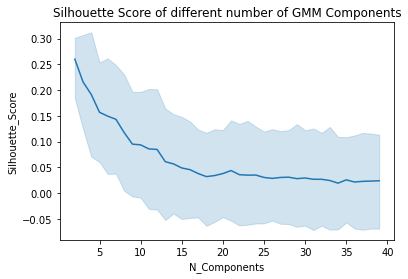

In [ ]:
sns.lineplot(data=score_1,x="N_Components", y="Silhouette_Score").set_title("Silhouette Score of different number of GMM Components")

Now let's apply suggested clusters

In [ ]:
gmm = GaussianMixture(4, 
                     covariance_type='spherical', 
                     random_state=0).fit(scaled)
#plt.scatter(x_train[:, 0], x_train[:, 1], c=labels, s=40, cmap='viridis');



In [ ]:
labels = gmm.predict(scaled)
labels

array([3, 2, 0, ..., 3, 1, 0])

In [ ]:
# converting preditcions into a df
gmmL = pd.DataFrame(data=labels, dtype=int)
gmmL.columns = ['GMM_Cluster']

# predictions as a df
print(gmmL.shape)
gmmL.tail()

(10001, 1)


,GMM_Cluster
9996,3
9997,1
9998,3
9999,1
10000,0


In [ ]:
x_trainC.shape

(10001, 9)

In [ ]:
x_trainC["GMM_Clusters"] =gmmL["GMM_Cluster"]

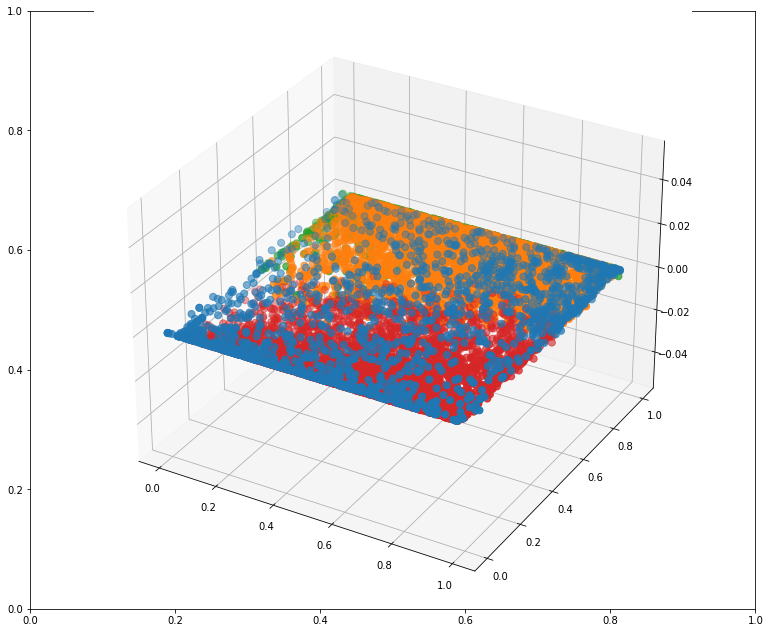

In [ ]:
fig, ax = plt.subplots(figsize=(13,11))
ax = fig.add_subplot(111, projection='3d')

plt.scatter(scaled[labels == 0,0],scaled[labels == 0,1], s= 50, label= 'Cluster 1')
plt.scatter(scaled[labels == 1,0], scaled[labels == 1,1], s= 50,  label= 'Cluster 2')
plt.scatter(scaled[labels == 2,0], scaled[labels == 2,1], s= 50, label= 'Cluster 3')
plt.scatter(scaled[labels == 3,0], scaled[labels == 3,1], s= 50,  label= 'Cluster 4')


Accuracy

BIC Score

In [ ]:
scoreB = []
gmm=GaussianMixture(n_components=4,covariance_type='spherical', random_state = 0)
gmm.fit(scaled)
scoreB.append((cov,4,gmm.bic(scaled)))
score_1B = pd.DataFrame(scoreB)
score_1B.columns = ['Covariance_Type', 'N_Components','BIC_Score']



In [ ]:
score_1B

,Covariance_Type,N_Components,BIC_Score
0,full,4,-48558.203272


K-Means

In [ ]:
#KMeans
#Silhouette Score
n_components = range(2, 30)
covariance_type = ['spherical', 'tied', 'diag', 'full']
score=[]
for cov in covariance_type:
    for n_comp in n_components:
        kmeans = KMeans(n_comp)
        kmeans.fit(scaled)
        pred = kmeans.predict(scaled)
        score_s = silhouette_score(scaled, pred, metric='euclidean')
        score.append((cov,n_comp,score_s))
score_1 = pd.DataFrame(score)
score_1.columns = ['Covariance_Type', 'N_Components','Silhouette_Score']
score_2 = score_1[score_1.Silhouette_Score == score_1.Silhouette_Score.max()]


In [ ]:
score_2

,Covariance_Type,N_Components,Silhouette_Score
28,tied,2,0.315112


In [ ]:
scorekB = []
kmeans = KMeans(2)
kmeans.fit(scaled)
pred = kmeans.predict(scaled)
scoreB.append((cov,4,gmm.bic(scaled)))
score_1B = pd.DataFrame(scoreB)
score_1B.columns = ['Covariance_Type', 'N_Components','BIC_Score']



In [ ]:
!pip install pyvis

DAG:

In [ ]:
x_train.columns
# bn.structure_learning.fit(x_train)
#print(DAG['adjmat'])

In [ ]:
edges=[('GMM_Clusters', 'valence'),
       ('GMM_Clusters','acousticness'),
       ('GMM_Clusters','speechiness'),
       ('GMM_Clusters','danceability'),
       ('GMM_Clusters', 'energy'),
       ('GMM_Clusters','instrumentalness'),
       ('GMM_Clusters','liveness'),
       ('GMM_Clusters','loudness'),
       ('GMM_Clusters','tempo')]

In [ ]:
DAG = bn.make_DAG(edges)
bn.plot(DAG)


In [ ]:
model_mle = bn.parameter_learning.fit(DAG, x_train, methodtype='maximumlikelihood')

In [ ]:
bn.print_CPD(model_mle)

Making Bayesian Inferences

In [ ]:
model = bn.parameter_learning.fit(DAG, x_train, methodtype='maximumlikelihood')
bn.print_CPD(model)


In [ ]:

q1 = bn.inference.fit(model, variables=['GMM_Clusters'], evidence={'Sprinkler':0})
print(q1.df)